<a href="https://colab.research.google.com/github/AugustoGuimaraesUFRJ/Machine-Learning/blob/main/Tarefa_2_Regress%C3%A3o_Logistica_Augusto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUGUSTO GUIMARÃES RODRIGUES DE LIMA DRE: 119025393

In [ ]:
# Carregando Bibliotecas
import pandas as pd
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## DATASET

In [ ]:
dataset = pd.read_csv("data-t1.csv")

In [ ]:
# 5 primeiras linhas do dataset
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#  Informações das colunas
#  Nome, quantidade de valores não-nulos e tipo
print("nome X quantidade de valores não-nulos X tipo: ")
dataset.info()

nome X quantidade de valores não-nulos X tipo: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non

In [ ]:
# Quantidade de linhas X colunas
print("quantidade de instancias X atributos: ")
dataset.shape

quantidade de instancias X atributos: 


(569, 33)

In [ ]:
# Elimina a coluna com valores NaN
dataset.dropna(axis=1,inplace=True)

In [ ]:
# Removendo coluna ID
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [ ]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0, 'M': 1})

In [ ]:
# Verifica linhas repetidas
dataset.drop_duplicates()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Número de instâncias para cada valor: 
0    357
1    212
Name: diagnosis, dtype: int64


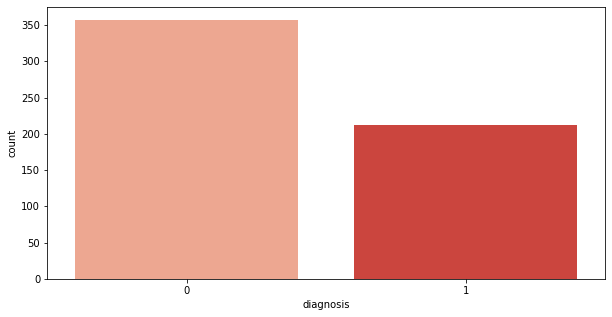

In [ ]:
# Número de instâncias por cada valor
print("Número de instâncias para cada valor: ") 
print(dataset['diagnosis'].value_counts())

# Gráfico da distribuição por diagnostico
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='diagnosis',  palette="Reds")

## Correlação

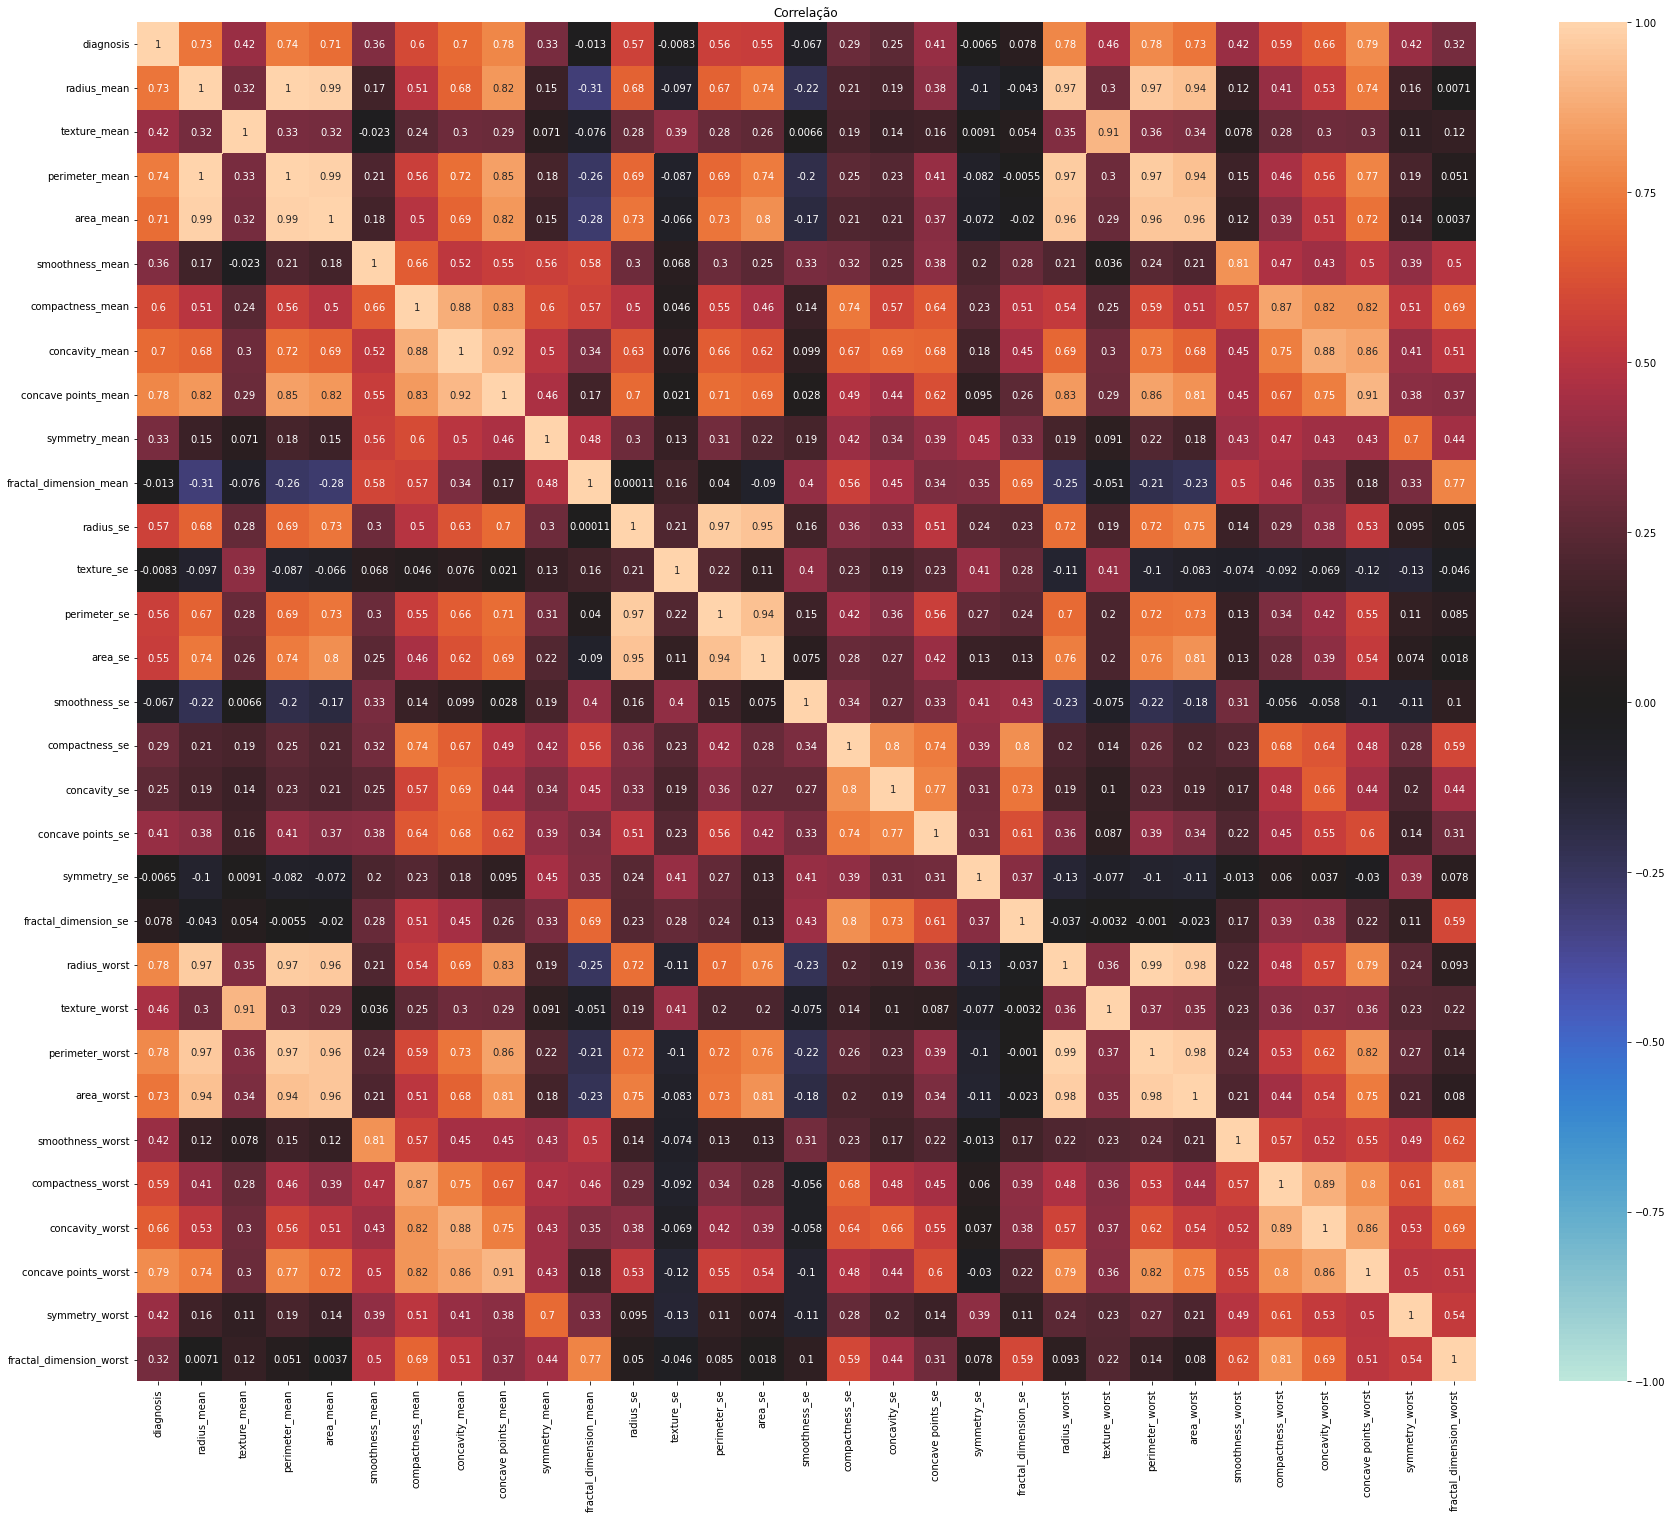

In [ ]:
# Correlação
features = dataset.columns
plt.figure(figsize=[30,25])
plt.title('Correlação')
sns.heatmap(dataset[features].corr(), vmin=-1, vmax=1, center=0, annot=True)  
plt.show()

## Normalizar os dados

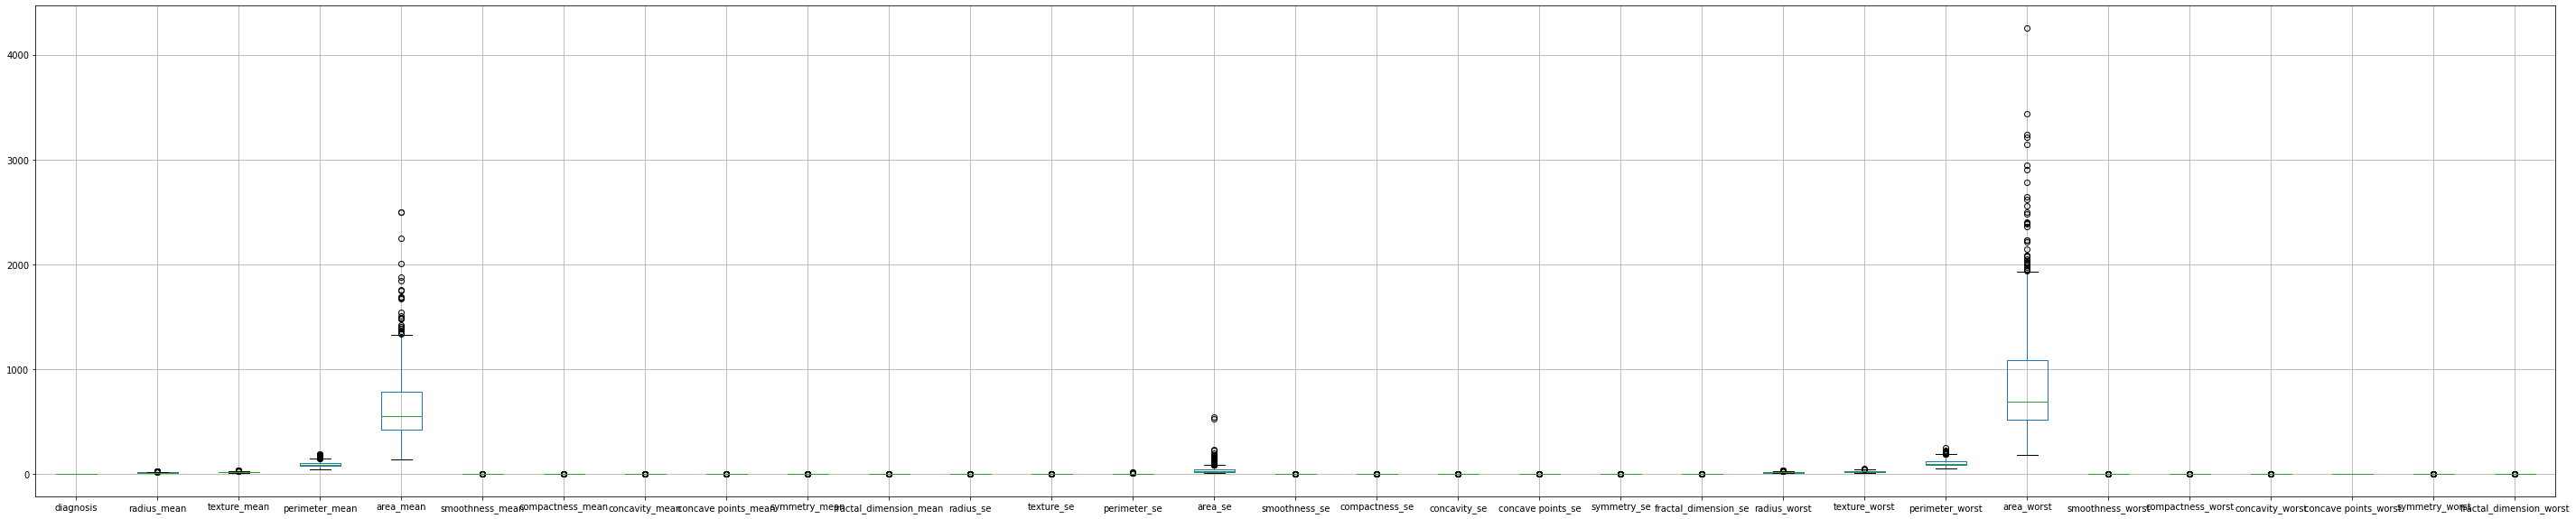

In [ ]:
# Analisando a Variação de Dados do dataset
dataset.boxplot(figsize=(50,10))

In [ ]:
# Vamos normalizar os dados
X = dataset.drop('diagnosis', axis = 1)
y = dataset['diagnosis']
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

X_nomalizado = mean_norm(X)

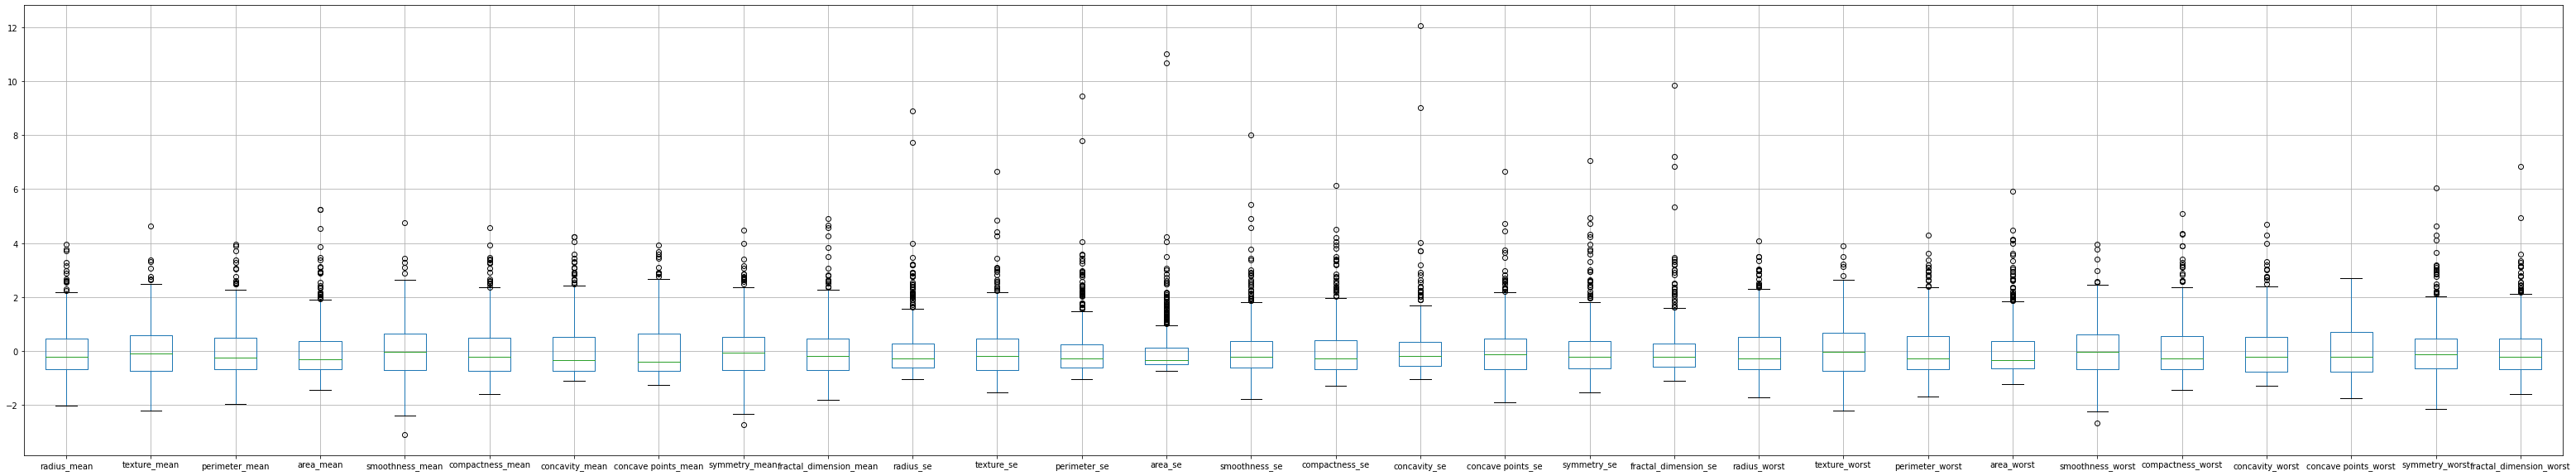

In [ ]:
X_nomalizado.boxplot(figsize=(55,10))

In [ ]:
result = pd.concat([y, X_nomalizado], axis=1)

## Regressão Logistica (Todos Atributos)

In [ ]:
X1 = result.drop('diagnosis', axis = 1)
y1 = result['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
#auc = metrics.accuracy_score(y_test, predictions)
#print(auc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.96      0.97        69

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



[[101   1]
 [  3  66]]


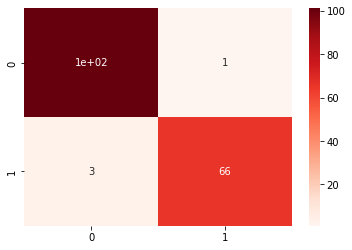

In [ ]:
#Matriz de confusão
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm,cmap="Reds",annot=True)

## Regressão Logistica (2 Atributos)

In [ ]:
X2 = result[['concave points_mean','concave points_worst']] ## Atributos mais correlacionados com diagnostico
y2 = result['diagnosis']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)
predictions2 = logreg.predict(X2_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, predictions2))
#auc2 = metrics.accuracy_score(y2_test, predictions2)
#print(auc2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       106
           1       0.87      0.89      0.88        65

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



[[97  9]
 [ 7 58]]


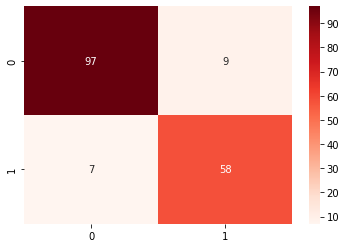

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2 = confusion_matrix(y2_test,predictions2)
print(cm2)
sns.heatmap(cm2, cmap="Reds",  annot=True)

Houve uma pequena piora nas metricas. Há mais atributos que são relevantes na construção do modelo

## Regressão Logistica (Tratando Outliers)

In [ ]:
# Método de John Tukey
from numpy import percentile
total=0
for column in result.columns:
    q25, q75 = percentile(result[column], 25), percentile(result[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identifica outliers
    outliers = [x for x in result[column] if x < lower or x > upper]
    print("Coluna: ",column)
    print('Outliers encontrados: %d' % len(outliers))
    print()
    total+=len(outliers)
    # remove outliers
    outliers_removed = [x for x in result[column] if x >= lower and x <= upper]
    result = result[result[column] < upper]
print("Total de outliers: ",total)

Coluna:  diagnosis
Outliers encontrados: 0

Coluna:  radius_mean
Outliers encontrados: 14

Coluna:  texture_mean
Outliers encontrados: 7

Coluna:  perimeter_mean
Outliers encontrados: 2

Coluna:  area_mean
Outliers encontrados: 33

Coluna:  smoothness_mean
Outliers encontrados: 6

Coluna:  compactness_mean
Outliers encontrados: 15

Coluna:  concavity_mean
Outliers encontrados: 13

Coluna:  concave points_mean
Outliers encontrados: 4

Coluna:  symmetry_mean
Outliers encontrados: 8

Coluna:  fractal_dimension_mean
Outliers encontrados: 10

Coluna:  radius_se
Outliers encontrados: 23

Coluna:  texture_se
Outliers encontrados: 15

Coluna:  perimeter_se
Outliers encontrados: 10

Coluna:  area_se
Outliers encontrados: 24

Coluna:  smoothness_se
Outliers encontrados: 15

Coluna:  compactness_se
Outliers encontrados: 14

Coluna:  concavity_se
Outliers encontrados: 6

Coluna:  concave points_se
Outliers encontrados: 3

Coluna:  symmetry_se
Outliers encontrados: 15

Coluna:  fractal_dimension_se

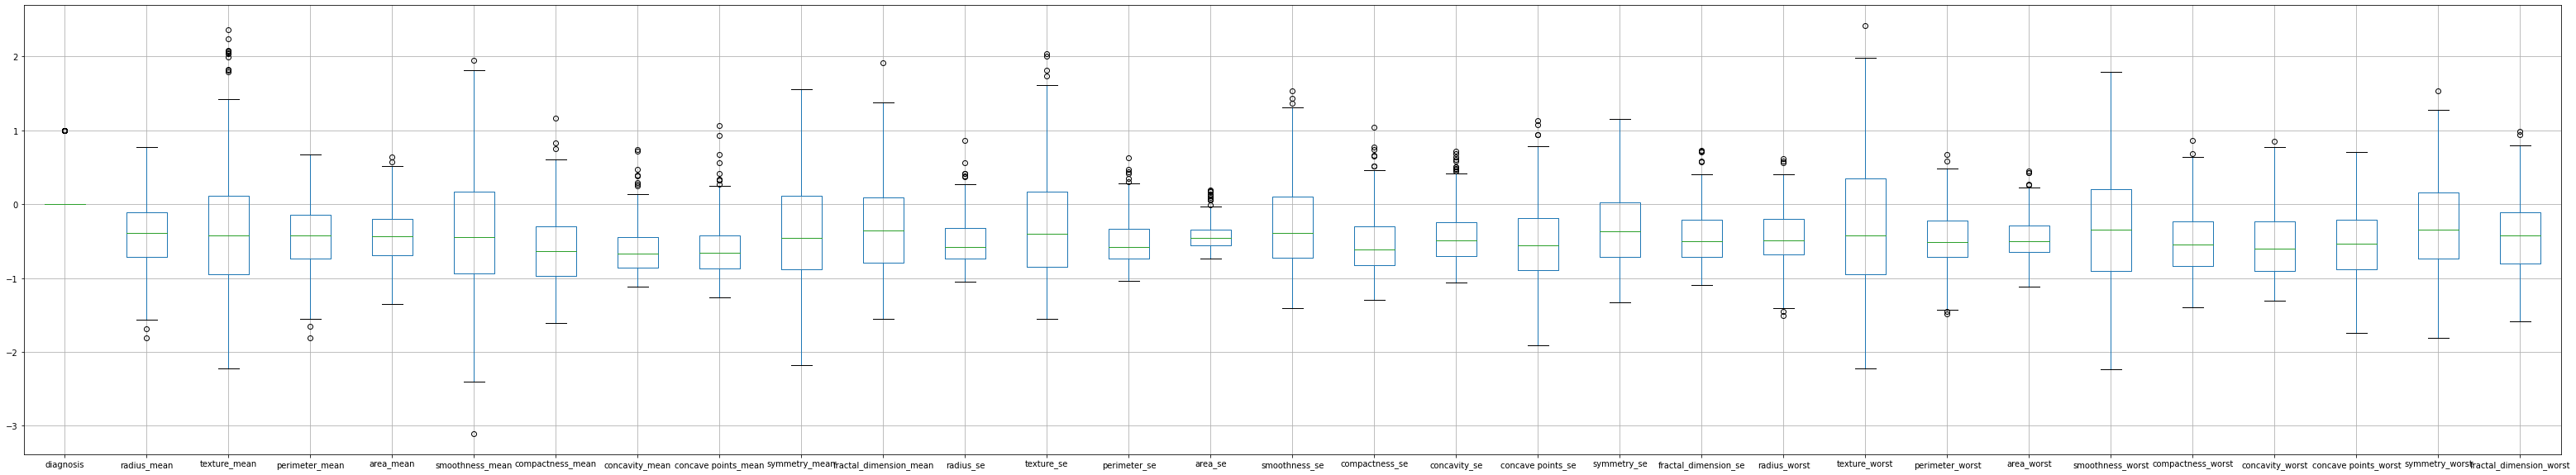

In [ ]:
result.boxplot(figsize=(55,10))

In [ ]:
X3 = result.drop('diagnosis', axis = 1)
y3 = result['diagnosis']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X3_train, y3_train)
predictions3 = logreg.predict(X3_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, predictions3))
#auc3 = metrics.accuracy_score(y3_test, predictions3)
#print(auc3)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        78
           1       1.00      0.17      0.29         6

    accuracy                           0.94        84
   macro avg       0.97      0.58      0.63        84
weighted avg       0.94      0.94      0.92        84



[[78  0]
 [ 5  1]]


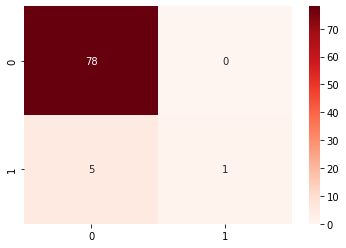

In [ ]:
#Matriz de confusão
import seaborn as sns
cm3 = confusion_matrix(y3_test,predictions3)
print(cm3)
sns.heatmap(cm3,cmap="Reds",annot=True)

Tirando a acuracia  e a precisão, houve uma piora nas metricas porque os dados ficaram desbalanceados

Número de instâncias para cada valor: 
0    255
1     22
Name: diagnosis, dtype: int64


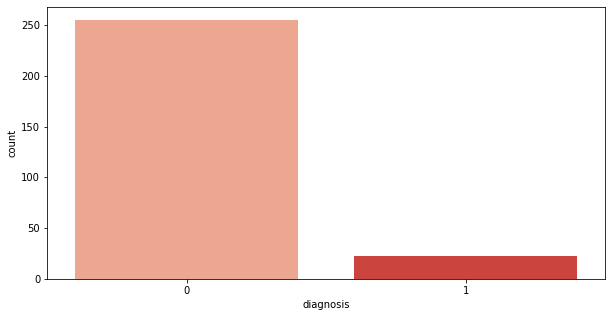

In [ ]:
# Número de instâncias por cada valor
print("Número de instâncias para cada valor: ") 
print(result['diagnosis'].value_counts())

# Gráfico da distribuição por diagnostico
plt.figure(figsize=(10,5))
sns.countplot(data=result,x='diagnosis',  palette="Reds")